# Jihun Choi, CS4650.02, Fall2023, Capstone Project: Crab Age Prediction using Linear Regression

# Need to run "pip install lightgbm" on the environment before doing anything

# Basic Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

# Read Data into a Panda DataFrame:

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [3]:
train.shape, test.shape

((74051, 9), (49368, 8))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


# Check and Clean the Dataset:

In [5]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
train.duplicated().sum()

0

In [7]:
train.drop_duplicates(inplace = True)

In [8]:
train['Sex'].value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

# Pie chart

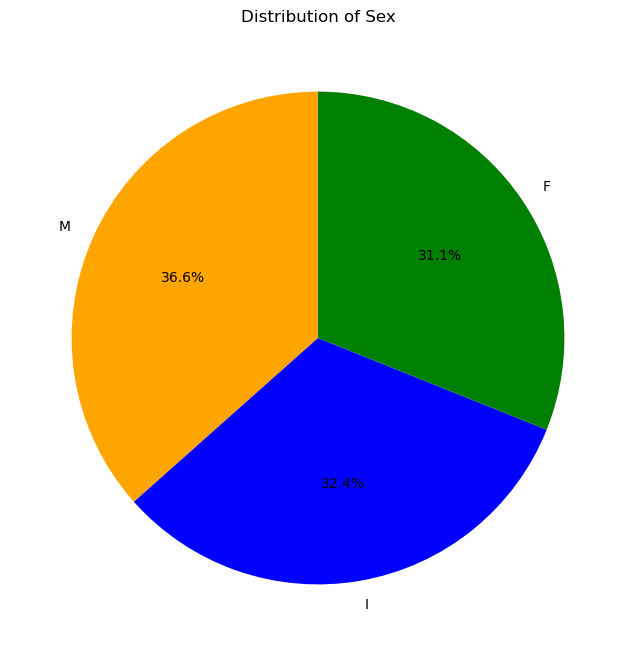

In [9]:
category_counts = train['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'blue', 'green'])
plt.title('Distribution of Sex')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

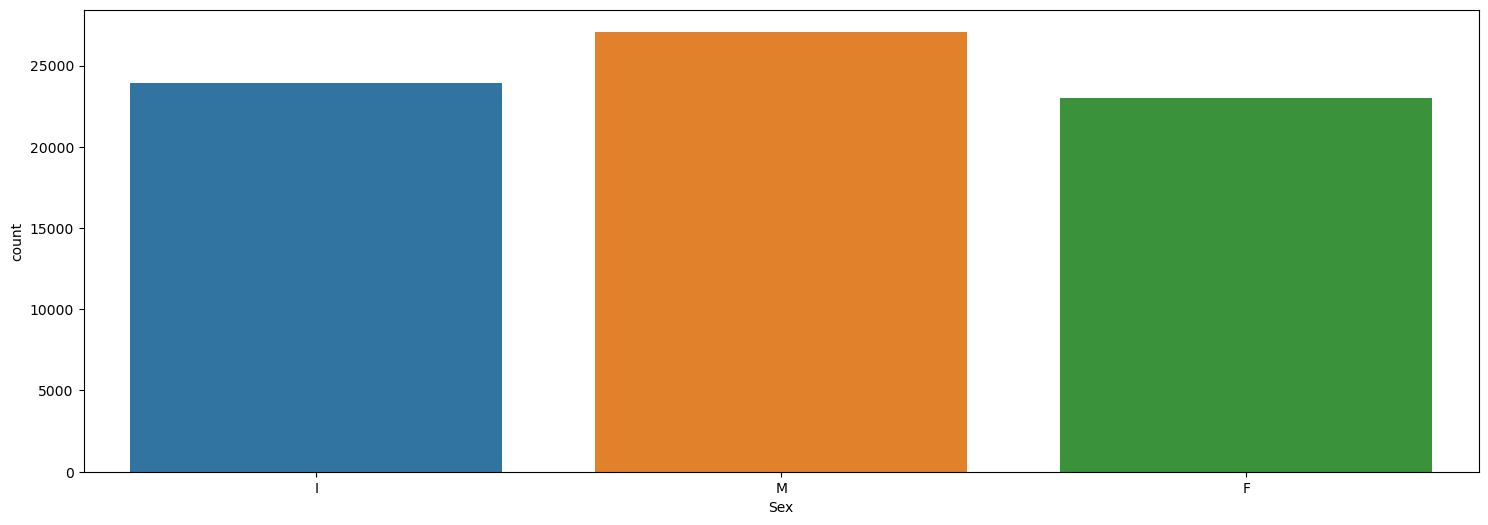

In [10]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(train,x='Sex')

# Chart of Each Feature:

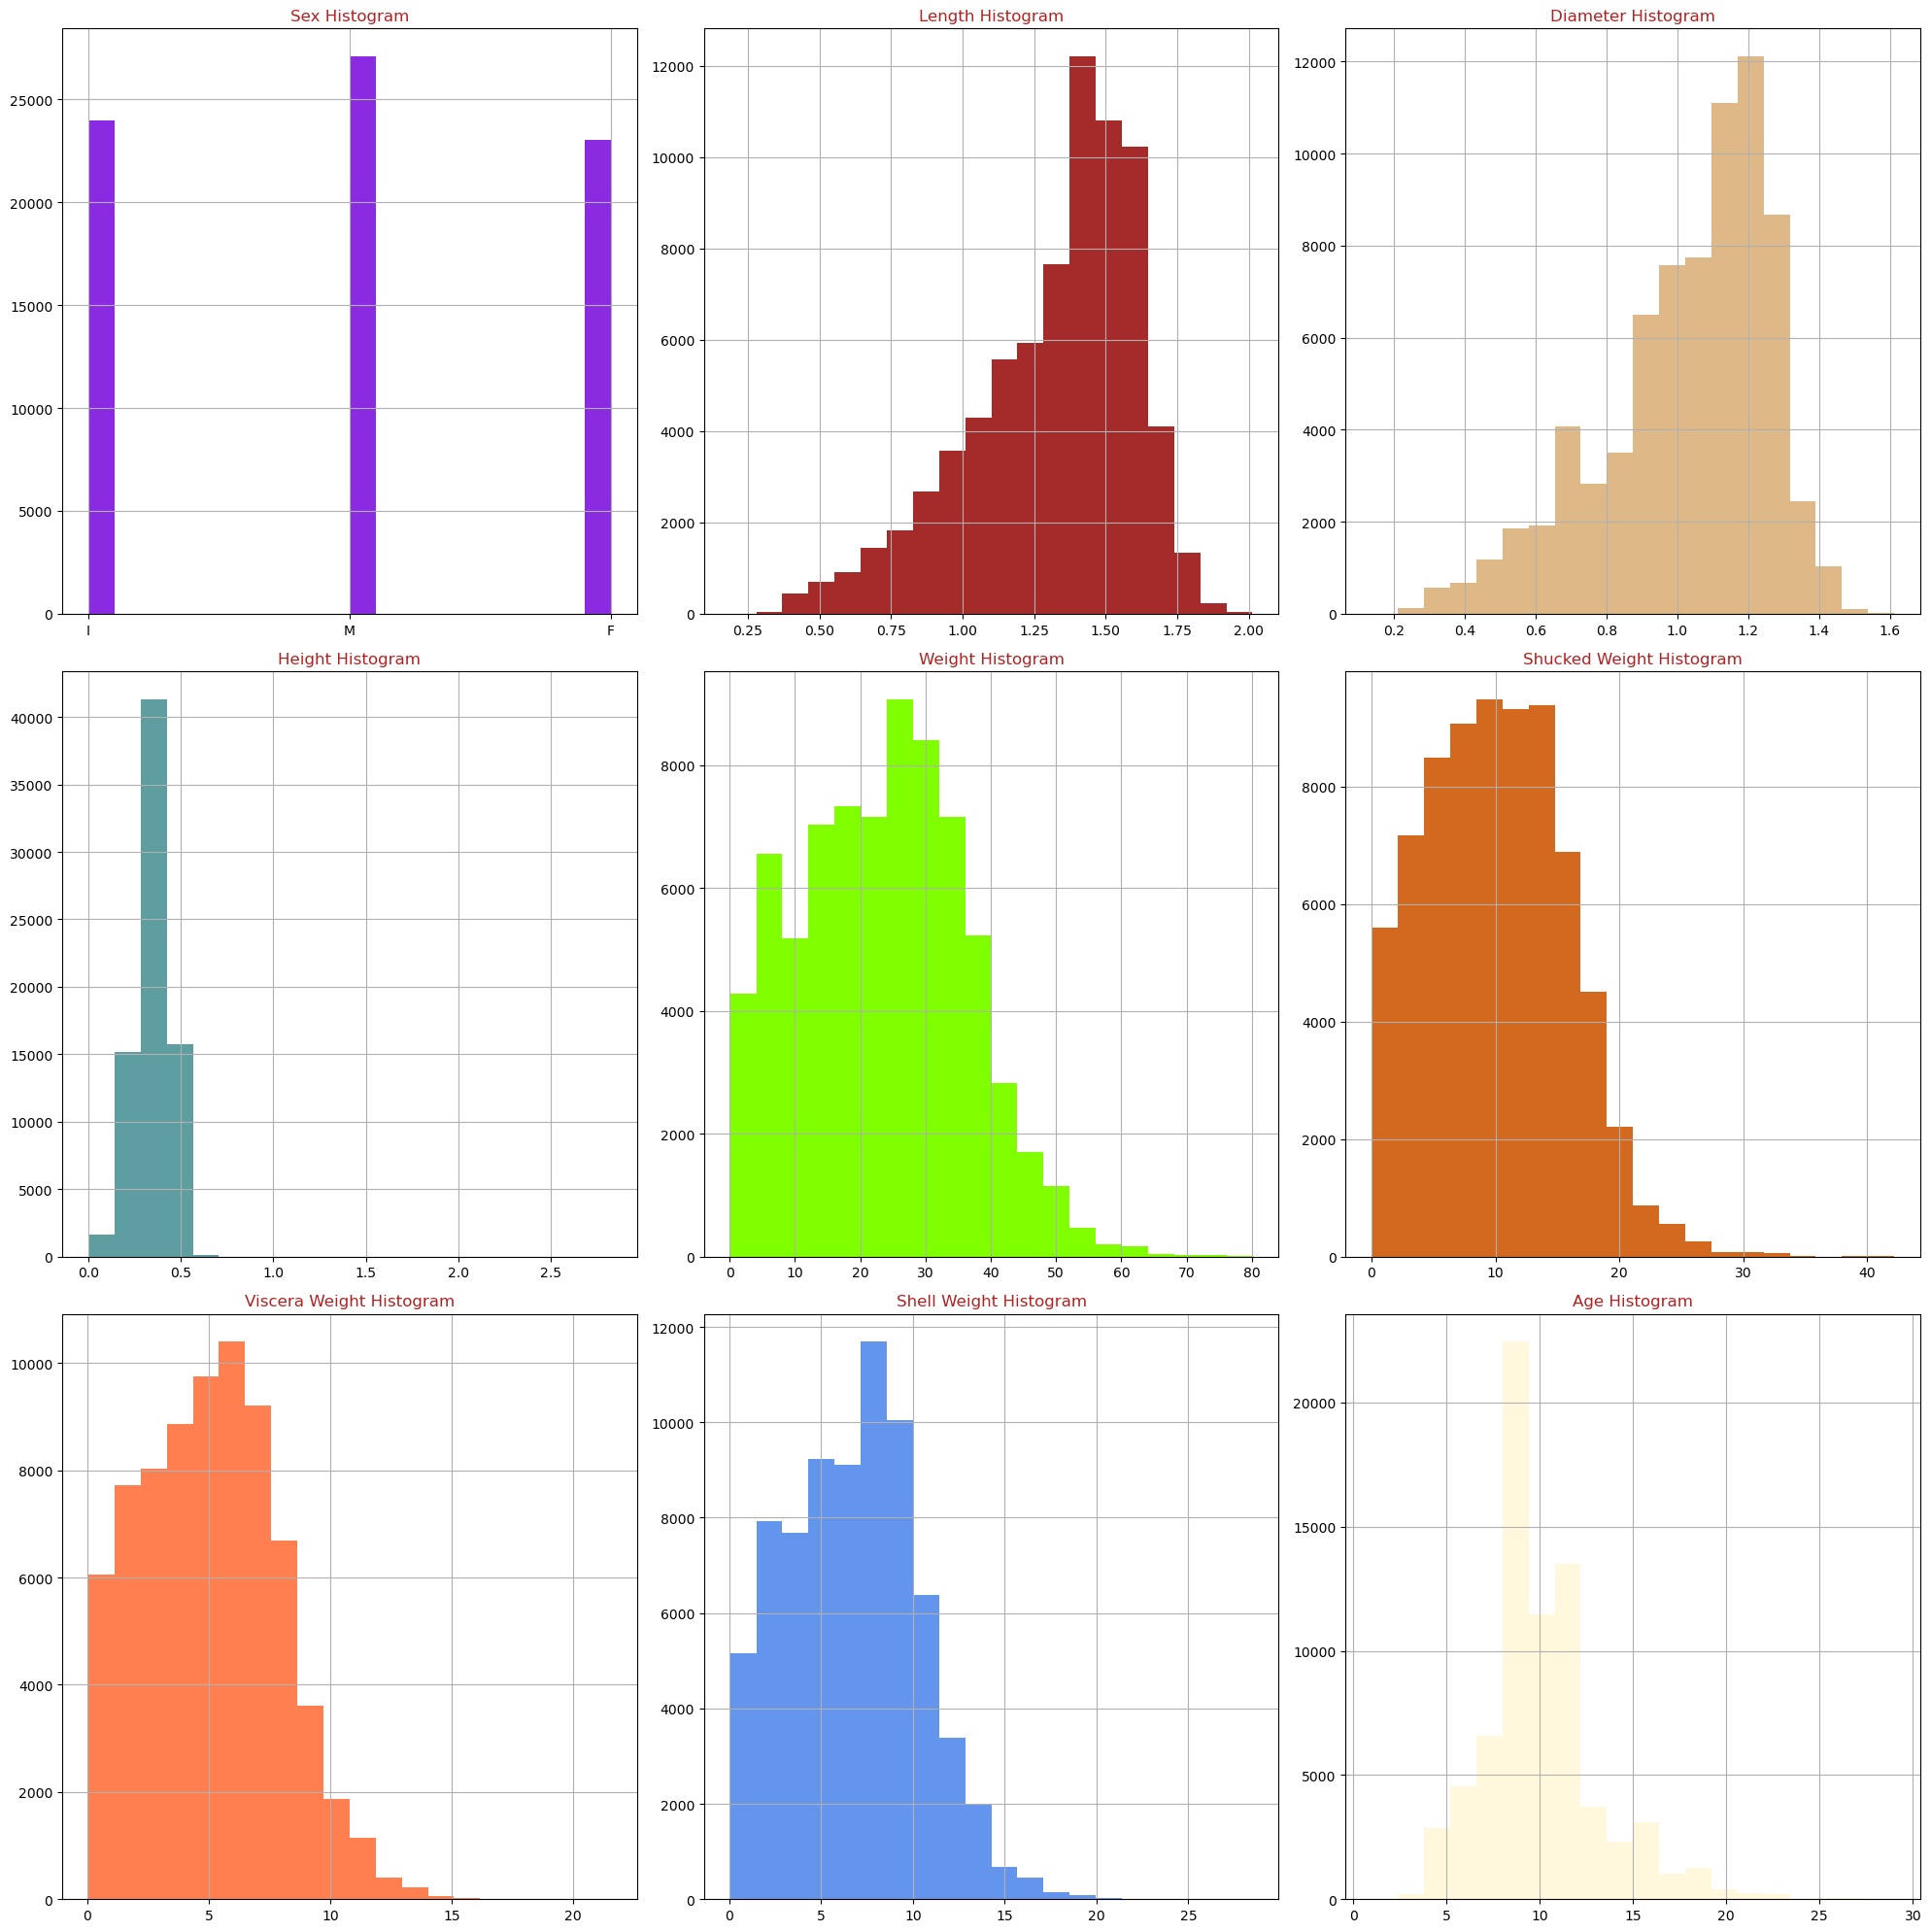

In [11]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(train.columns):
    f = fig.add_subplot(3, 3, i + 1)
    train[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

# Scale with log:

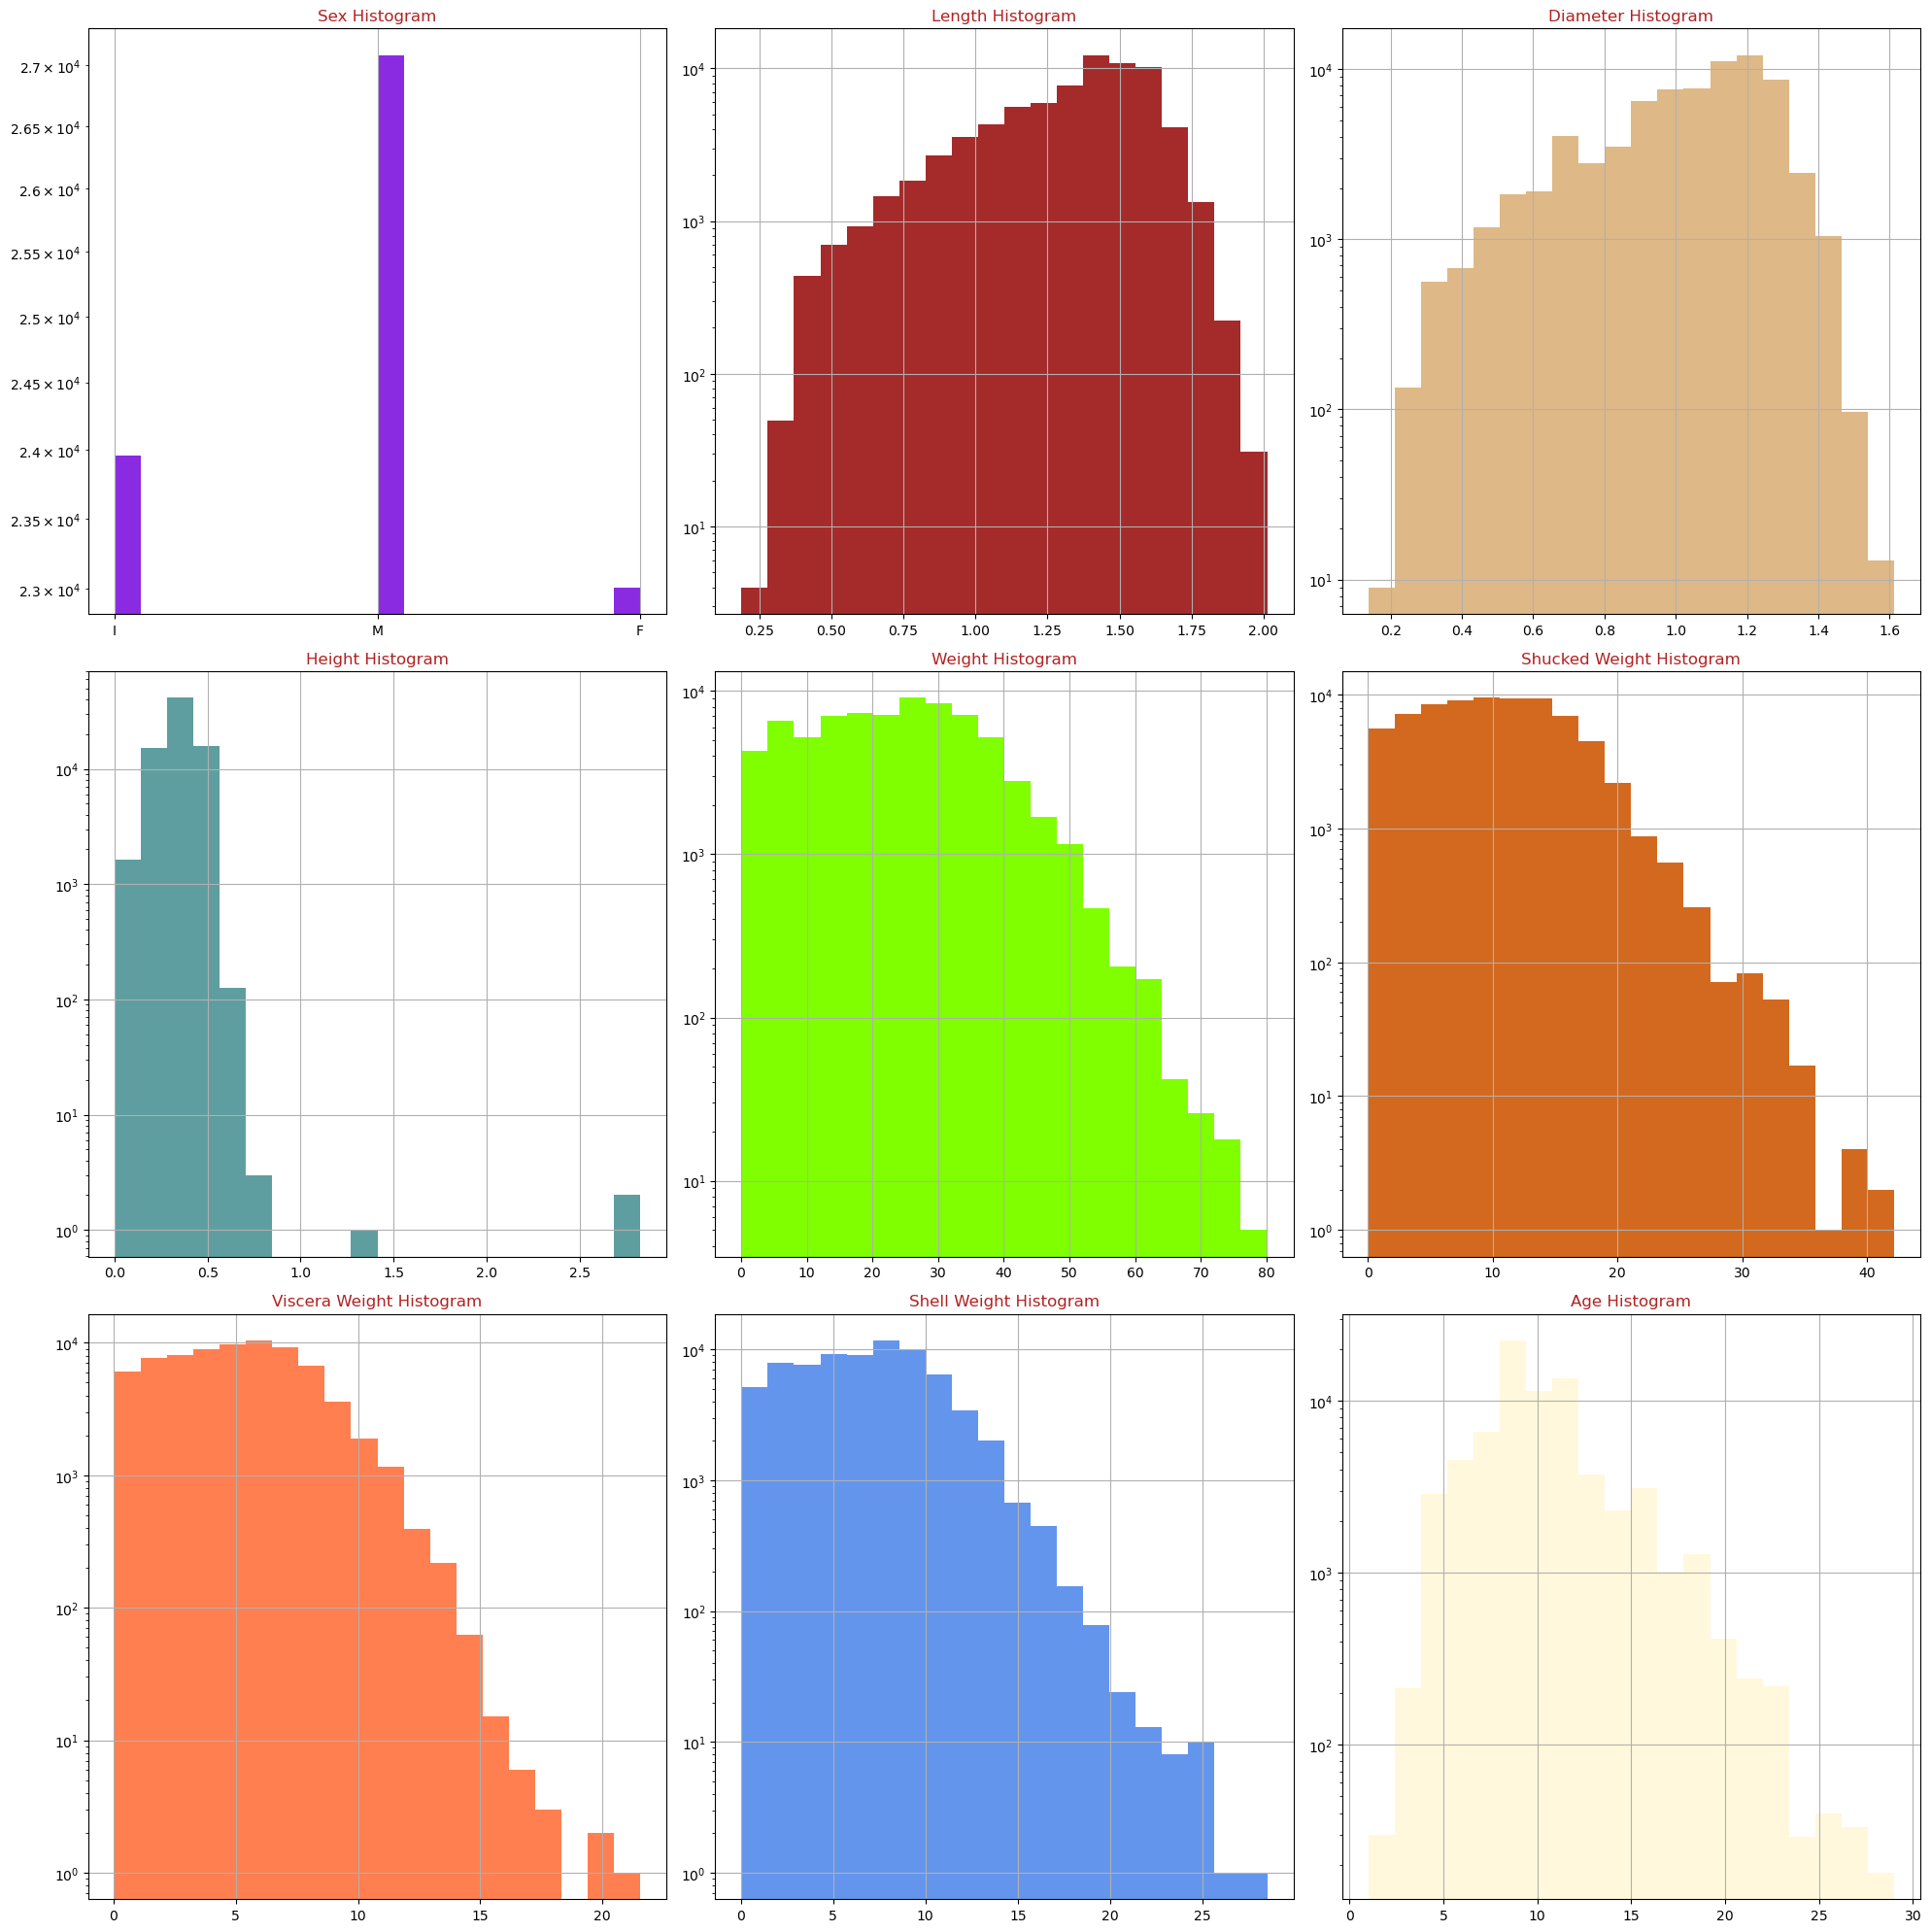

In [12]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(train.columns):
    f = fig.add_subplot(3, 3, i + 1)
    train[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
    f.set_yscale('log')
fig.tight_layout()
plt.show()

# Check spearman correlation:

<Axes: >

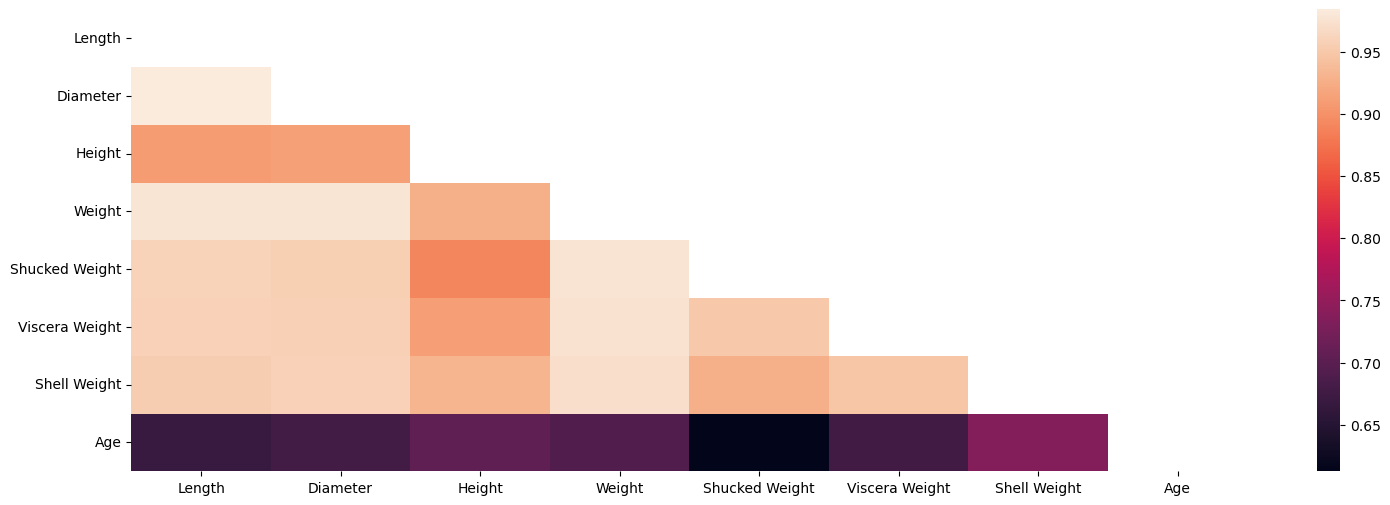

In [13]:
train_corr = train.corr(method='spearman', numeric_only='silence')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(train_corr, mask=np.triu(train_corr))

# Build the Model and Run Training:

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])

In [15]:
# list for cv scores and predictions
lr_pred, cv_pred = list(), list()

# make X and y
X = train.drop(['Age'], axis=1)
y = train['Age']

# make an instance of kfold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# make an instatnce of linear regression
lgbm_model = LGBMRegressor()

# start KFold
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # fit the model
    linear_fit = lgbm_model.fit(X_train, y_train)
    
    # predict the model with test_index
    test_pred = linear_fit.predict(X_test)
    
    # check mae
    test_mae = mean_absolute_error(y_test, test_pred)
    cv_pred.append(test_mae)
    
    # print mae
    print('----: Fold', i, '----')
    print('mae:', test_mae)
    
    # predict the test dataset
    lr_pred.append(linear_fit.predict(test))
    
# print the mean mae
print('---- mean MAE ----')
print('mae: ', np.mean(test_mae))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1320
[LightGBM] [Info] Number of data points in the train set: 66645, number of used features: 8
[LightGBM] [Info] Start training from score 9.968445
----: Fold 0 ----
mae: 1.411011664718994
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 66646, number of used features: 8
[LightGBM] [Info] Start training from score 9.969270
----: Fold 1 ----
mae: 1.4005981548876985
[LightGBM] 

# Submit the result to see age prediction

In [16]:
prediction = pd.DataFrame(lr_pred).apply(np.mean, axis=0)
submission['Age'] = prediction
submission.to_csv('result.csv', index=False)

In [17]:
sampleOutput = pd.read_csv('result.csv')
sampleOutput.head()

,id,Age
0,74051,7.544098
1,74052,7.792214
2,74053,10.861195
3,74054,9.501064
4,74055,7.517005
